# Tech - manipulation de données avec pandas

[pandas](https://pandas.pydata.org/) est la librairie incontournable pour manipuler les données. Elle manipuler aussi bien les données sous forme de tables qu'elle écrit ou lit celles-ci en différents formats. Elle permet également de créer facilement des graphes.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
%matplotlib inline

## Enoncé

La librairie [pandas](https://pandas.pydata.org/) implémente la classe [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). C'est une structure de table, chaque colonne porte un nom et contient un seul type de données. C'est très similaire au langage [SQL](https://fr.wikipedia.org/wiki/Structured_Query_Language).

### Création d'un dataframe

Il existe une grande variété pour créer un DataFrame. Voici les deux principaux. Le premier : une liste de dictionnaires. Chaque clé est le nom de la colonne.

In [3]:
from pandas import DataFrame

rows = [{'col1': 0.5, 'col2': 'schtroumph'},
        {'col1': 0.6, 'col2': 'schtroumphette'}]
DataFrame(rows)

,col1,col2
0,0.5,schtroumph
1,0.6,schtroumphette


La lecture depuis un fichier :

In [4]:
%%writefile data.csv

col1,col2
0.5,alpha
0.6,beta

Overwriting data.csv


In [5]:
import os
os.getcwd()

'C:\\xavierdupre\\__home_\\GitHub\\ensae_teaching_cs\\_doc\\notebooks\\td1a_home'

In [6]:
from pandas import read_csv
df = read_csv('data.csv')
df

,col1,col2
0,0.5,alpha
1,0.6,beta


### La maîtrise des index

Les index fonctionnent à peu près comme [numpy](https://numpy.org/) mais offre plus d'options puisque les colonnes mais aussi les lignes ont un nom.

Accès par colonne

In [7]:
df

,col1,col2
0,0.5,alpha
1,0.6,beta


In [8]:
df['col1']

0    0.5
1    0.6
Name: col1, dtype: float64

In [9]:
df[['col1', 'col2']]

,col1,col2
0,0.5,alpha
1,0.6,beta


Accès par ligne (uniquement avec ``:``). On se sert principalement de l'opérateur ``:`` pour les lignes.

In [10]:
df[:1]

,col1,col2
0,0.5,alpha


Accès par positions avec [loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html).

In [11]:
df.loc[0, 'col1']

0.5

Accès par positions entières avec [iloc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html).

In [12]:
df.iloc[0, 0]

0.5

### La maîtrise des index des lignes

La création d'un dataframe donne l'impression que les index des lignes sont des entiers mais cela peut être changer

In [13]:
df

,col1,col2
0,0.5,alpha
1,0.6,beta


In [14]:
dfi = df.set_index('col2')
dfi

,col1
col2,
alpha,0.5
beta,0.6


In [15]:
dfi.loc['alpha', 'col1']

0.5

Il faut se souvenir de cette particularité lors de la fusion de tables.

### La maîtrise des index des colonnes

Les colonnes sont nommées.

In [16]:
df.columns

Index(['col1', 'col2'], dtype='object')

On peut les renommer.

In [17]:
df.columns = ["valeur", "nom"]
df

,valeur,nom
0,0.5,alpha
1,0.6,beta


L'opérateur ``:`` peut également servir pour les colonnes.

In [18]:
df.loc[:, 'valeur':'nom']

,valeur,nom
0,0.5,alpha
1,0.6,beta


### Lien vers numpy

[pandas](https://pandas.pydata.org/) utilise [numpy](https://numpy.org/) pour stocker les données. Il est possible de récupérer des matrices depuis des DataFrame avec [values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.values.html).

In [19]:
df.values

array([[0.5, 'alpha'],
       [0.6, 'beta']], dtype=object)

In [20]:
df[['valeur']].values

array([[0.5],
       [0.6]])

### La maîtrise du nan

[nan](https://numpy.org/doc/stable/reference/constants.html) est une convention pour désigner une valeur manquante.

In [21]:
rows = [{'col1': 0.5, 'col2': 'schtroumph'},
        {'col2': 'schtroumphette'}]
DataFrame(rows)

,col1,col2
0,0.5,schtroumph
1,NaN,schtroumphette


### La maîtrise des types

Un dataframe est défini par ses dimensions et chaque colonne a un type potentiellement différent.

In [22]:
df.dtypes

valeur    float64
nom        object
dtype: object

On peut changer un type, donc convertir toutes les valeurs d'une colonne vers un autre type.

In [23]:
import numpy
df['valeur'].astype(numpy.float32)

0    0.5
1    0.6
Name: valeur, dtype: float32

In [24]:
import numpy
df['valeur'].astype(numpy.int32)

0    0
1    0
Name: valeur, dtype: int32

### Création de colonnes

On peut facilement créer de nouvelles colonnes.

In [25]:
df['sup055'] = df['valeur'] >= 0.55
df

,valeur,nom,sup055
0,0.5,alpha,False
1,0.6,beta,True


In [26]:
df['sup055'] = (df['valeur'] >= 0.55).astype(numpy.int64)
df

,valeur,nom,sup055
0,0.5,alpha,0
1,0.6,beta,1


In [27]:
df['sup055+'] = df['valeur'] + df['sup055']
df

,valeur,nom,sup055,sup055+
0,0.5,alpha,0,0.5
1,0.6,beta,1,1.6


### Modifications de valeurs

On peut les modifier une à une en utilisant les index. Les notations sont souvent intuitives. Elles ne seront pas toutes détaillées. Ci-dessous un moyen de modifer certaines valeurs selon une condition.

In [28]:
df.loc[df['nom'] == 'alpha', 'sup055+'] += 1000
df

,valeur,nom,sup055,sup055+
0,0.5,alpha,0,1000.5
1,0.6,beta,1,1.6


### Une erreur ou warning fréquent

In [29]:
rows = [{'col1': 0.5, 'col2': 'schtroumph'},
        {'col1': 1.5, 'col2': 'schtroumphette'}]
df = DataFrame(rows)
df

,col1,col2
0,0.5,schtroumph
1,1.5,schtroumphette


In [30]:
df1 = df[df['col1'] > 1.]
df1

,col1,col2
1,1.5,schtroumphette


In [31]:
df1["col3"] = df1["col1"] + 1.
df1

c:\python372_x64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,col1,col2,col3
1,1.5,schtroumphette,2.5


``A value is trying to be set on a copy of a slice from a DataFrame.`` : Par défaut, l'instruction ``df[df['col1'] > 1.]`` ne crée pas un nouveau DataFrame, elle crée ce qu'on appelle une vue pour éviter de copier les données. Le résultat ne contient que l'index des lignes qui ont été sélectionnées et un lien vers le dataframe original. L'avertissement stipule que *pandas* ne peut pas modifier le dataframe original mais qu'il doit effectuer une copie.

La solution pour faire disparaître ce warning est de copier le dataframe.

In [32]:
df2 = df1.copy()
df2["col3"] = df2["col1"] + 1.

### La maîtrise des fonctions

Les fonctions de pandas créent par défaut un nouveau dataframe plutôt que de modifier un dataframe existant. Cela explique pourquoi parfois la mémoire se retrouve congestionnée. La page [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) est un bon début.

* **création** : [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html), [read_excel](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html)
* **index** : [set_index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html), [reset_index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html)
* **utilitaires** : [astype](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html), [isna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html), [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html), [to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html), [dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html), [shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html), [values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.values.html), [head](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html), [tail](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html), [isin](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html), [T](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.T.html), [drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)
* **concaténation** : [concat](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)
* **SQL** : [filter](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.filter.html), [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html), [join](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html), [merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html), [pivot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html), [pivot_table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot_table.html)
* **calcul** : [sum](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html), [cumsum](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cumsum.html), [quantile](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html), [var](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.var.html)

### On récupère les données du COVID par région et par âge et premier graphe

A cette adresse : [Données hospitalières relatives à l'épidémie de COVID-19](https://www.data.gouv.fr/en/datasets/donnees-hospitalieres-relatives-a-lepidemie-de-covid-19/)

In [33]:
# https://www.data.gouv.fr/en/datasets/r/63352e38-d353-4b54-bfd1-f1b3ee1cabd7
from pandas import read_csv
url = "https://www.data.gouv.fr/en/datasets/r/08c18e08-6780-452d-9b8c-ae244ad529b3"
covid = read_csv(url, sep=";")
covid.tail()

,reg,cl_age90,jour,hosp,rea,rad,dc
41971,94,59,2020-10-17,7,1,47,2
41972,94,69,2020-10-17,4,2,52,4
41973,94,79,2020-10-17,16,5,73,16
41974,94,89,2020-10-17,7,0,46,31
41975,94,90,2020-10-17,3,0,25,14


In [34]:
covid.dtypes

reg          int64
cl_age90     int64
jour        object
hosp         int64
rea          int64
rad          int64
dc           int64
dtype: object

Les dates sont considérées comme des chaînes de caractères. Il est plus simple pour réaliser des opérations de convertir la colonne sous forme de dates.

In [35]:
from pandas import to_datetime
covid['jour'] = to_datetime(covid['jour'])
covid.tail()

,reg,cl_age90,jour,hosp,rea,rad,dc
41971,94,59,2020-10-17,7,1,47,2
41972,94,69,2020-10-17,4,2,52,4
41973,94,79,2020-10-17,16,5,73,16
41974,94,89,2020-10-17,7,0,46,31
41975,94,90,2020-10-17,3,0,25,14


In [36]:
covid.dtypes

reg                  int64
cl_age90             int64
jour        datetime64[ns]
hosp                 int64
rea                  int64
rad                  int64
dc                   int64
dtype: object

On supprime les colonnes relatives aux régions et à l'âge puis on aggrège par jour.

In [37]:
agg_par_jour = covid.drop(['reg', 'cl_age90'], axis=1).groupby('jour').sum()
agg_par_jour.tail()

,hosp,rea,rad,dc
jour,,,,
2020-10-12,17289,3068,203059,43813
2020-10-13,17801,3255,204616,43981
2020-10-14,18286,3317,206078,44188
2020-10-16,19984,3575,208637,44607
2020-10-17,20734,3728,209628,44784


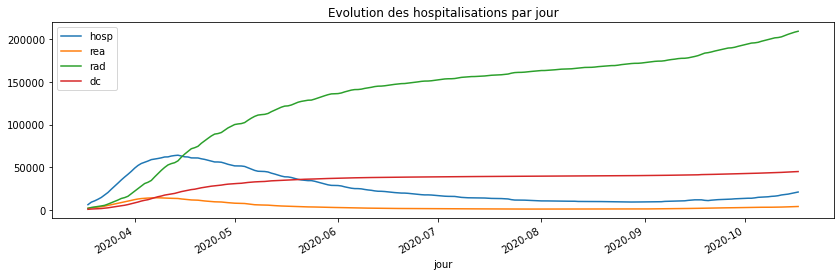

In [38]:
agg_par_jour.plot(title="Evolution des hospitalisations par jour",
                  figsize=(14, 4));

Avec échelle logarithmique.

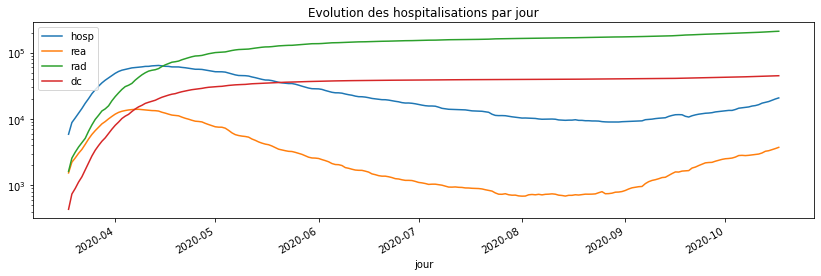

In [39]:
agg_par_jour.plot(title="Evolution des hospitalisations par jour",
                  figsize=(14, 4), logy=True);

### Q1 : refaire le graphique précédent pour votre classe d'âge

### Q2 : faire de même avec les séries différenciées

### Q3 : faire de même avec des séries lissées sur sur 7 jours

### Q4 : fusion de tables par départements

## Réponses

### Q1 : refaire le graphique précédent pour votre classe d'âge

In [44]:
set(covid['cl_age90'])

{0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 90}

In [45]:
covid49 = covid[covid.cl_age90 == 49]
agg_par_jour49 = covid49.drop(['reg', 'cl_age90'], axis=1).groupby('jour').sum()
agg_par_jour49.tail()

,hosp,rea,rad,dc
jour,,,,
2020-10-12,422,94,9235,277
2020-10-13,417,91,9300,279
2020-10-14,409,84,9368,279
2020-10-16,420,95,9465,283
2020-10-17,442,100,9500,283


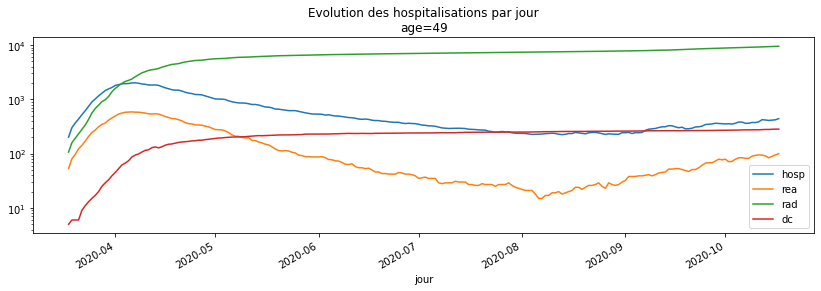

In [46]:
agg_par_jour49.plot(title="Evolution des hospitalisations par jour\nage=49",
                    figsize=(14, 4), logy=True);

### Q2 : faire de même avec les séries différenciées

In [47]:
covid.tail()

,reg,cl_age90,jour,hosp,rea,rad,dc
41971,94,59,2020-10-17,7,1,47,2
41972,94,69,2020-10-17,4,2,52,4
41973,94,79,2020-10-17,16,5,73,16
41974,94,89,2020-10-17,7,0,46,31
41975,94,90,2020-10-17,3,0,25,14


In [48]:
diff = covid.drop(['reg', 'cl_age90'], axis=1).groupby(
    ['jour']).sum().diff()
diff.tail(n=2)

,hosp,rea,rad,dc
jour,,,,
2020-10-16,1698.0,258.0,2559.0,419.0
2020-10-17,750.0,153.0,991.0,177.0


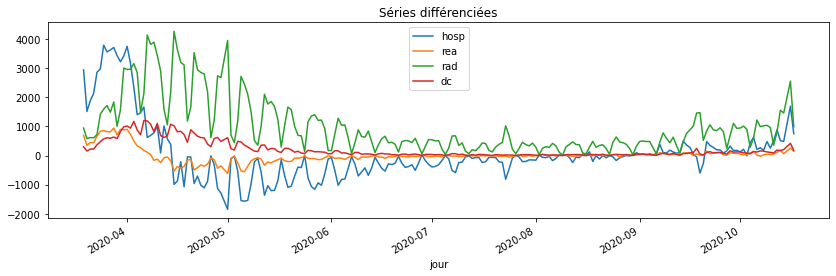

In [49]:
diff.plot(title="Séries différenciées", figsize=(14, 4));

### Q3 : faire de même avec des séries lissées sur sur 7 jours

In [50]:
diff.rolling(7)

Rolling [window=7,center=False,axis=0]

In [51]:
roll = diff.rolling(7).mean()
roll.tail(n=2)

,hosp,rea,rad,dc
jour,,,,
2020-10-16,689.714286,107.000000,1249.857143,186.857143
2020-10-17,727.857143,122.714286,1242.857143,194.285714


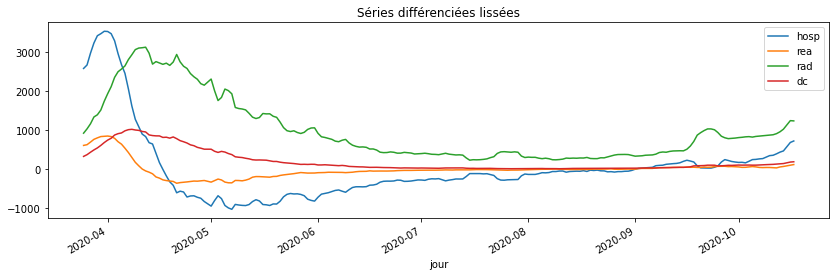

In [52]:
roll.plot(title="Séries différenciées lissées", figsize=(14, 4));

### Petit aparté

On veut savoir combien de temps les gens restent à l'hôpital avant de sortir, en supposant que le temps de guérison est à peu près identique au temps passé lorsque l'issue est tout autre. Je pensais calculer les corrélations entre la série des décès et celles de réanimations décalées de plusieurs jours en me disant qu'un pic de corrélation pourrait indiquer une sorte de durée moyenne de réanimation.

In [53]:
data = agg_par_jour49.diff().rolling(7).mean()
data.tail(n=2)

,hosp,rea,rad,dc
jour,,,,
2020-10-16,8.142857,1.857143,50.428571,1.285714
2020-10-17,9.571429,1.428571,49.428571,1.285714


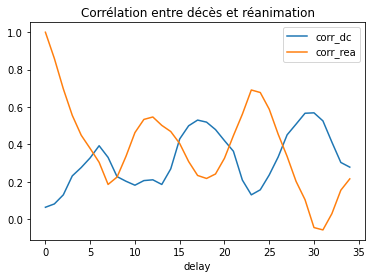

In [54]:
data_last = data.tail(n=90)
cor = []
for i in range(0, 35):
    ts = DataFrame(dict(rea=data_last.rea, dc=data_last.dc,
                        dclag=data_last["dc"].shift(i),
                        realag=data_last["rea"].shift(i)))
    ts_cor = ts.corr()
    cor.append(dict(delay=i, corr_dc=ts_cor.iloc[1, 3],
                    corr_rea=ts_cor.iloc[0, 3]))
DataFrame(cor).set_index('delay').plot(title="Corrélation entre décès et réanimation");

Il apparaît que ces corrélations sont très différentes selon qu'on les calcule sur les dernières données et les premières semaines. Cela semblerait indiquer que les données médicales sont très différentes. On pourrait chercher plusieurs jours mais le plus simple serait sans de générer des données artificielles avec un modèle [SIR](https://fr.wikipedia.org/wiki/Mod%C3%A8les_compartimentaux_en_%C3%A9pid%C3%A9miologie) et vérifier si ce raisonnement tient la route sur des données propres.

### Q4 : fusion de tables par départements

On récupère deux jeux de données :
* [Données hospitalières relatives à l'épidémie de COVID-19](https://www.data.gouv.fr/en/datasets/donnees-hospitalieres-relatives-a-lepidemie-de-covid-19/)
* [Indicateurs de suivi de l’épidémie de COVID-19](https://www.data.gouv.fr/fr/datasets/indicateurs-de-suivi-de-lepidemie-de-covid-19/)

In [55]:
hosp = read_csv("https://www.data.gouv.fr/en/datasets/r/63352e38-d353-4b54-bfd1-f1b3ee1cabd7",
               sep=";")
hosp.tail()

,dep,sexe,jour,hosp,rea,rad,dc
64537,974,1,2020-10-17,33,8,223,9
64538,974,2,2020-10-17,14,2,221,15
64539,976,0,2020-10-17,9,3,466,29
64540,976,1,2020-10-17,8,3,218,18
64541,976,2,2020-10-17,1,0,242,11


In [56]:
indic = read_csv("https://www.data.gouv.fr/fr/datasets/r/4acad602-d8b1-4516-bc71-7d5574d5f33e",
                encoding="ISO-8859-1")
indic.tail()

,extract_date,departement,region,libelle_reg,libelle_dep,tx_incid,R,taux_occupation_sae,tx_pos,tx_incid_couleur,R_couleur,taux_occupation_sae_couleur,tx_pos_couleur,nb_orange,nb_rouge
21407,2020-10-13,84,93,Provence Alpes Côte d'Azur,Vaucluse,187.17,1.2,43.7,11.803058,rouge,orange,orange,rouge,2,2
21408,2020-10-14,84,93,Provence Alpes Côte d'Azur,Vaucluse,NaN,NaN,42.6,NaN,NaN,NaN,orange,NaN,1,0
21409,2020-10-11,84,93,Provence Alpes Côte d'Azur,Vaucluse,157.40,NaN,40.7,11.271381,rouge,NaN,orange,rouge,1,2
21410,2020-10-12,84,93,Provence Alpes Côte d'Azur,Vaucluse,175.94,NaN,42.4,11.568214,rouge,NaN,orange,rouge,1,2
21411,2020-10-16,84,93,Provence Alpes Côte d'Azur,Vaucluse,NaN,1.3,45.4,NaN,NaN,orange,orange,NaN,2,0


Le code suivant explique comment trouver la valeur ``ISO-8859-1``.

In [57]:
# import chardet
# with open("indicateurs-covid19-dep.csv", "rb") as f:
#     content = f.read()
# chardet.detect(content)  # {'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

### Q5 : une carte ?

Tracer une carte n'est jamais simple. Il faut tout d'abord récupérer les coordonnées des départements : [Contours des départements français issus d'OpenStreetMap](https://www.data.gouv.fr/en/datasets/contours-des-departements-francais-issus-d-openstreetmap/). Ensuite... de ces fichiers ont été extraits les barycentres de chaque département français : [departement_french_2018.csv](https://github.com/sdpython/ensae_teaching_cs/blob/master/src/ensae_teaching_cs/data/data_shp/departement_french_2018.csv). Ce fichier a été créé avec la fonction implémentée dans le fichier [data_shape_files.py](https://github.com/sdpython/ensae_teaching_cs/blob/master/src/ensae_teaching_cs/data/data_shape_files.py). Ce qui suit est une approximation de carte : on suppose que là où se trouve, les coordonnées longitude et latitude ne sont pas trop éloignées de ce qu'elles pourraient être si elles étaient projetées sur une sphère.

In [59]:
dep_pos = read_csv("https://raw.githubusercontent.com/sdpython/ensae_teaching_cs/"
                   "master/src/ensae_teaching_cs/data/data_shp/departement_french_2018.csv")
dep_pos.tail()

,code_insee,nom,nuts3,wikipedia,surf_km2,DEPLONG,DEPLAT
97,56,Morbihan,FR524,fr:Morbihan,6870.0,-2.812320,47.846846
98,25,Doubs,FR431,fr:Doubs (département),5256.0,6.362722,47.165964
99,39,Jura,FR432,fr:Jura (département),5049.0,5.697361,46.729368
100,07,Ardèche,FR712,fr:Ardèche (département),5566.0,4.425582,44.752771
101,30,Gard,FR812,fr:Gard,5875.0,4.179861,43.993601


In [60]:
last_extract_date = max(set(indic.extract_date))
last_extract_date

'2020-10-16'

In [61]:
indic_last = indic[indic.extract_date == last_extract_date]
merge = indic_last.merge(dep_pos, left_on='departement', right_on='code_insee')
final = merge[['code_insee', 'nom', 'DEPLONG', 'DEPLAT', 'taux_occupation_sae', 'R']]
metro = final[final.DEPLAT > 40]
metro

,code_insee,nom,DEPLONG,DEPLAT,taux_occupation_sae,R
0,01,Ain,5.348764,46.099799,47.2,1.55
1,03,Allier,3.187644,46.393637,47.2,1.55
2,07,Ardèche,4.425582,44.752771,47.2,1.55
3,15,Cantal,2.669045,45.051247,47.2,1.55
4,26,Drôme,5.167364,44.685239,47.2,1.55
...,...,...,...,...,...,...
95,05,Hautes-Alpes,6.265318,44.663965,45.4,1.30
96,06,Alpes-Maritimes,7.116532,43.937937,45.4,1.30
97,13,Bouches-du-Rhône,5.086225,43.543055,45.4,1.30
98,83,Var,6.244490,43.441656,45.4,1.30


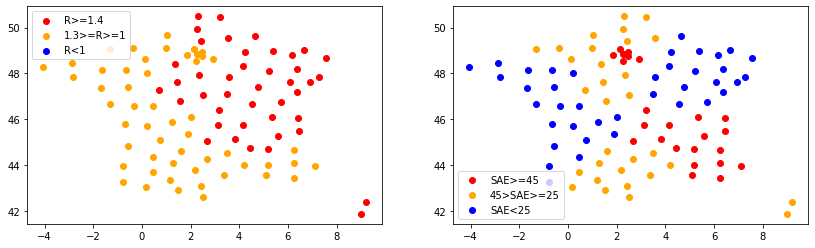

In [62]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
bigR1 = metro.R >= 1
bigR2 = metro.R >= 1.4
ax[0].scatter(metro.loc[bigR2, 'DEPLONG'], metro.loc[bigR2, 'DEPLAT'], c='red', label='R>=1.4');
ax[0].scatter(metro.loc[bigR1 & ~bigR2, 'DEPLONG'], metro.loc[bigR1 & ~bigR2, 'DEPLAT'], c='orange', label='1.3>=R>=1');
ax[0].scatter(metro.loc[~bigR1, 'DEPLONG'], metro.loc[~bigR1, 'DEPLAT'], c='blue', label='R<1');
ax[0].legend()

bigR1 = metro.taux_occupation_sae >= 25
bigR2 = metro.taux_occupation_sae >= 45
ax[1].scatter(metro.loc[bigR2, 'DEPLONG'], metro.loc[bigR2, 'DEPLAT'], c='red', label='SAE>=45');
ax[1].scatter(metro.loc[bigR1 & ~bigR2, 'DEPLONG'], metro.loc[bigR1 & ~bigR2, 'DEPLAT'], c='orange', label='45>SAE>=25');
ax[1].scatter(metro.loc[~bigR1, 'DEPLONG'], metro.loc[~bigR1, 'DEPLAT'], c='blue', label='SAE<25');
ax[1].legend();

In [63]:
metro[metro.nom == "Ardennes"]

,code_insee,nom,DEPLONG,DEPLAT,taux_occupation_sae,R
31,08,Ardennes,4.640751,49.616226,15.5,1.6
